# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../data/Ames_outliers_removed.csv")

In [9]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
len(df.columns)

81

In [12]:
df.set_index(df.columns[0], inplace=True)

In [13]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [15]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [23]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [24]:
percent_nan = percent_missing(df)

In [25]:
percent_nan

Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Finish      5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

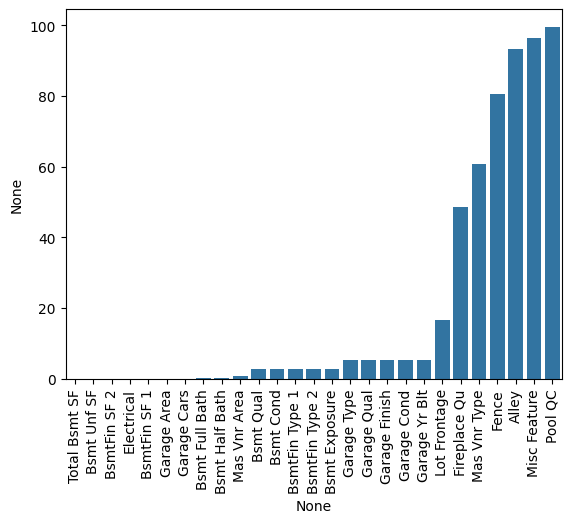

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

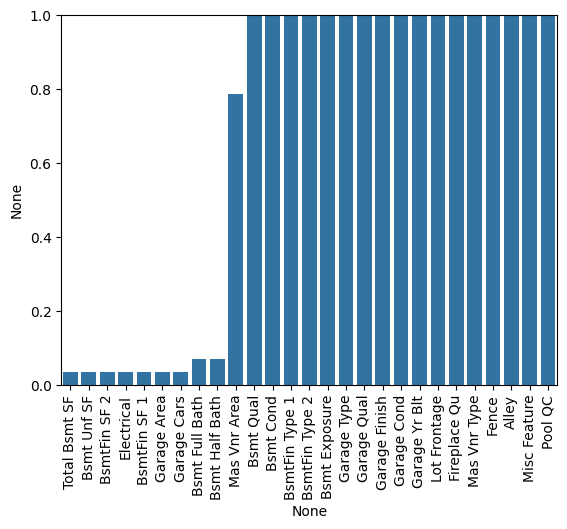

In [34]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0, 1)

In [36]:
percent_nan[percent_nan < 1]

Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [38]:
df[df["Electrical"].isna()]["Garage Area"]

PID
916386080    400.0
Name: Garage Area, dtype: float64

In [39]:
df[df["Bsmt Half Bath"].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [41]:
df = df.dropna(axis=0, subset=["Garage Area", "Electrical"])

In [42]:
percent_nan = percent_missing(df)

(0.0, 1.0)

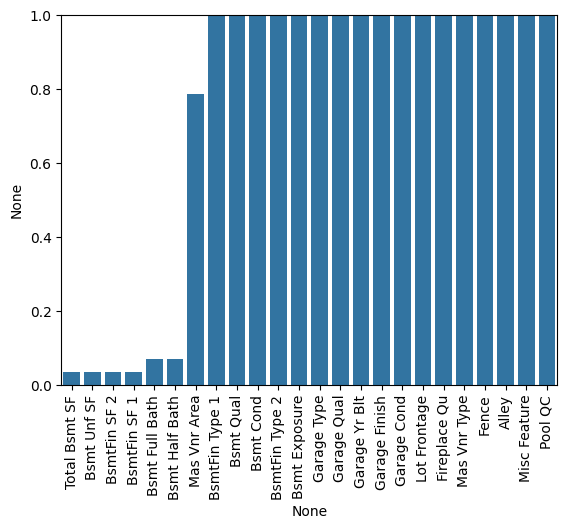

In [43]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0, 1)

In [44]:
df[df["Bsmt Half Bath"].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [45]:
df[df["Bsmt Full Bath"].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [46]:
df[df["Bsmt Unf SF"].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [55]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [58]:
df.loc[:, bsmt_num_cols] = df.loc[:, bsmt_num_cols].fillna(0)

In [59]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df.loc[:, bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [60]:
percent_nan = percent_missing(df)

(0.0, 1.0)

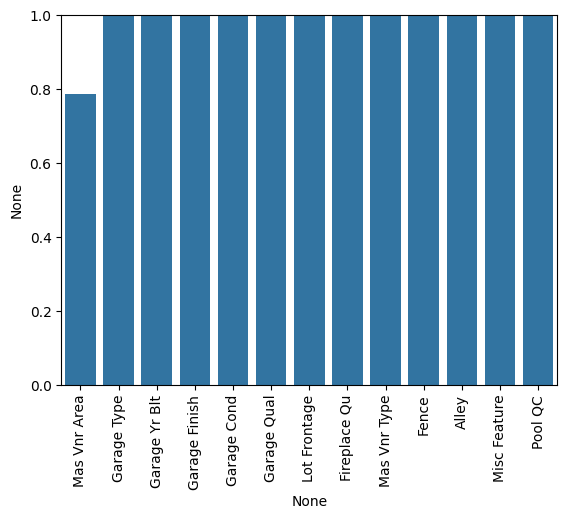

In [61]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0, 1)

In [62]:
df.loc[:, "Mas Vnr Type"] = df["Mas Vnr Type"].fillna('None')

In [63]:
percent_nan = percent_missing(df)

(0.0, 1.0)

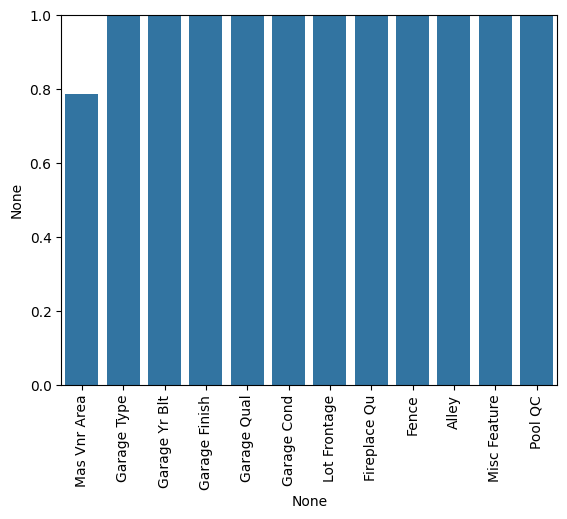

In [64]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0, 1)

In [65]:
df.loc[:, "Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [66]:
percent_nan = percent_missing(df)

(0.0, 1.0)

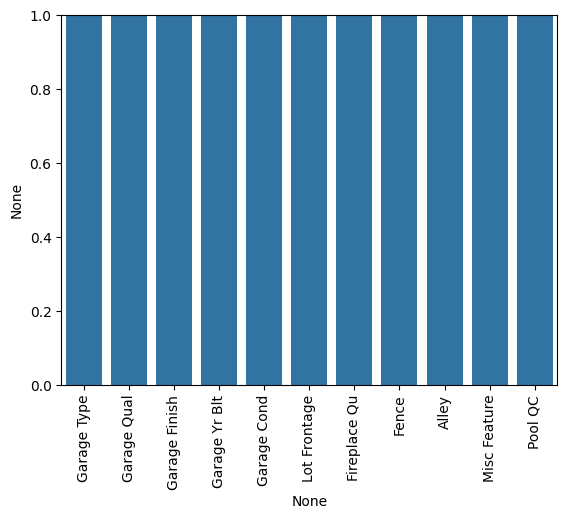

In [67]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0, 1)

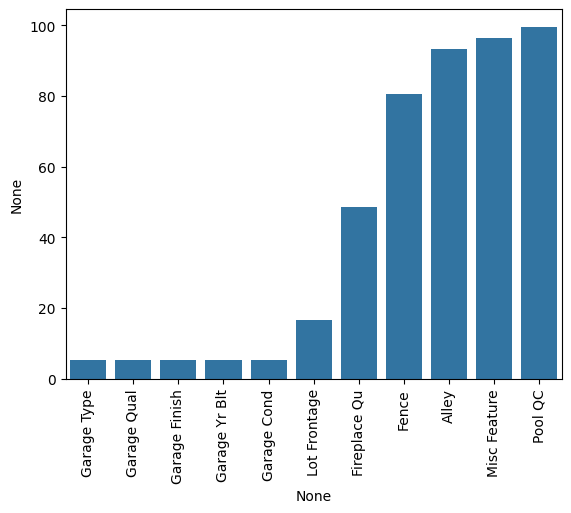

In [68]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [70]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df.loc[:, gar_str_cols] = df.loc[:, gar_str_cols].fillna('None')

In [72]:
df.loc[:, 'Garage Yr Blt'] = df.loc[:, 'Garage Yr Blt'].fillna(0)

In [73]:
percent_nan = percent_missing(df)

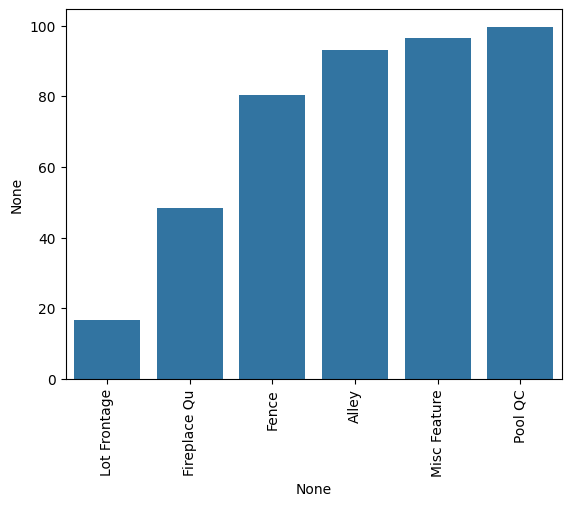

In [74]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [75]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
PID,,,,,,
526301100,141.0,Gd,NaN,NaN,NaN,NaN
526350040,80.0,NaN,MnPrv,NaN,NaN,NaN
526351010,81.0,NaN,NaN,NaN,Gar2,NaN
526353030,93.0,TA,NaN,NaN,NaN,NaN
527105010,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
923275080,37.0,NaN,GdPrv,NaN,NaN,NaN
923276100,NaN,NaN,MnPrv,NaN,NaN,NaN
923400125,62.0,NaN,MnPrv,NaN,Shed,NaN


In [76]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [77]:
percent_nan = percent_missing(df)

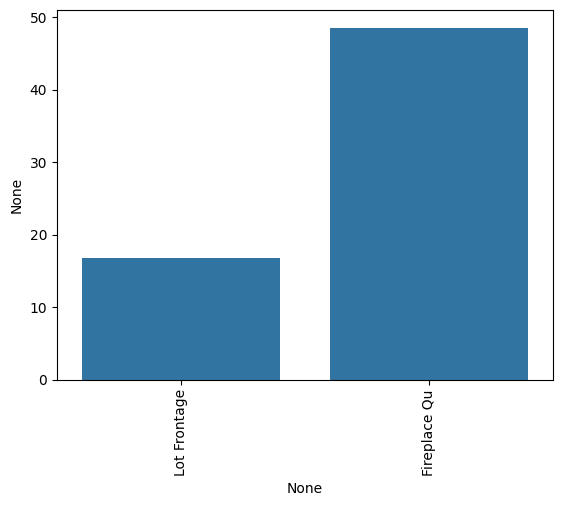

In [78]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [79]:
df.loc[:, 'Fireplace Qu'] = df.loc[:, 'Fireplace Qu'].fillna("None")

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

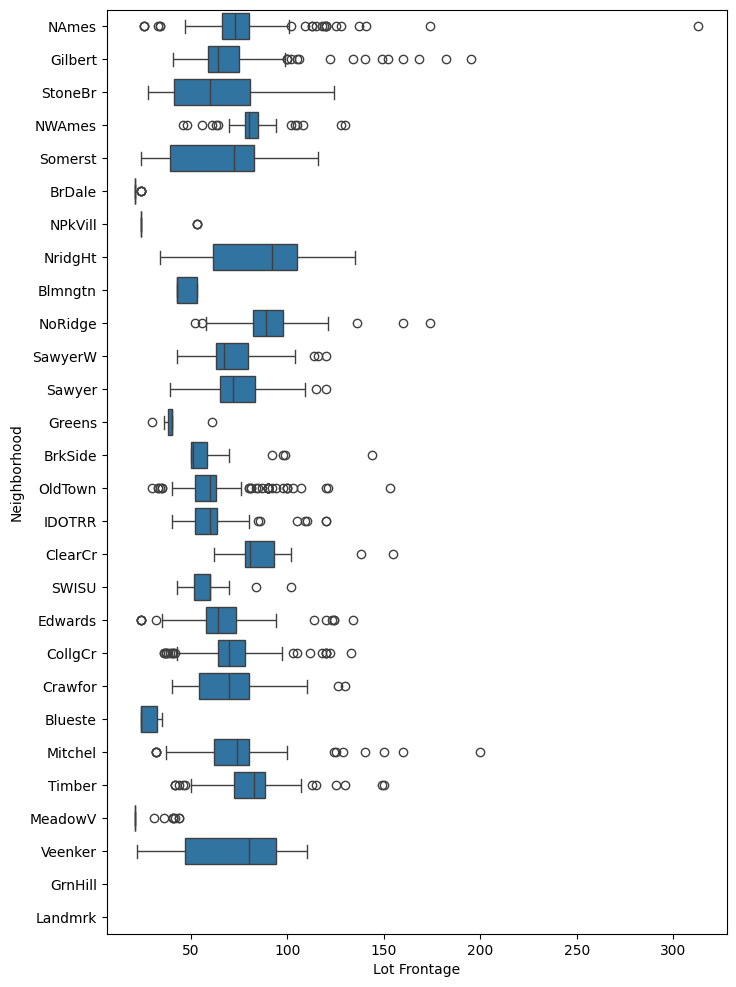

In [80]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [82]:
df.head()["Lot Frontage"]

PID
526301100    141.0
526350040     80.0
526351010     81.0
526353030     93.0
527105010     74.0
Name: Lot Frontage, dtype: float64

In [85]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [88]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

PID
526301100    141.000000
526350040     80.000000
526351010     81.000000
526353030     93.000000
527105010     74.000000
                ...    
923275080     37.000000
923276100     75.144444
923400125     62.000000
924100070     77.000000
924151050     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [90]:
df.groupby('Neighborhood')['Lot Frontage'].transform("mean")

PID
526301100    75.210667
526350040    75.210667
526351010    75.210667
526353030    75.210667
527105010    74.207207
               ...    
923275080    75.144444
923276100    75.144444
923400125    75.144444
924100070    75.144444
924151050    75.144444
Name: Lot Frontage, Length: 2925, dtype: float64

In [93]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: print(val))

PID
528228285    43.0
528228440    43.0
528228290    53.0
528228295    51.0
528228435    43.0
528228450    43.0
528228455    43.0
528228460    43.0
528228345     NaN
528228405     NaN
528228445    43.0
528228465    43.0
528228540    53.0
528228270    53.0
528228275    53.0
528228375     NaN
528228555    53.0
528228280    43.0
528228325     NaN
528228340     NaN
528228360     NaN
528228415     NaN
528228430     NaN
528228545    43.0
528228550    43.0
528228565    43.0
528228575    53.0
528228580    53.0
Name: Blmngtn, dtype: float64
PID
909455030    35.0
909455040    35.0
909451040    24.0
909451100    24.0
909451140    24.0
909451180    24.0
909451020    24.0
909451150    24.0
909451130    24.0
909455060    35.0
Name: Blueste, dtype: float64
PID
527451180    21.0
527451330    21.0
527451410    21.0
527450280    21.0
527451110    24.0
527451320    21.0
527451540    21.0
527451640    21.0
527451650    21.0
527450110    21.0
527450250    21.0
527450520    21.0
527451060    21.0
527451290 

PID
526301100   NaN
526350040   NaN
526351010   NaN
526353030   NaN
527105010   NaN
             ..
923275080   NaN
923276100   NaN
923400125   NaN
924100070   NaN
924151050   NaN
Name: Lot Frontage, Length: 2925, dtype: float64

In [94]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [95]:
percent_nan = percent_missing(df)

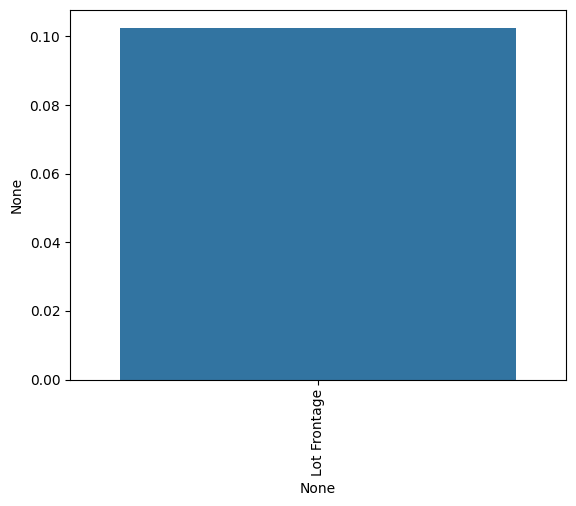

In [96]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [97]:
df["Lot Frontage"].isna().sum()

np.int64(3)

In [98]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [99]:
percent_nan = percent_missing(df)

In [100]:
percent_nan

Series([], dtype: float64)